### Problem Statement :
#### A Health care Organization has information about vitals revealing a person might have Coronary Heart Disease in next 10 years or not.
#### Construct a Classification Model based on the available data & evaluate its efficacy

In [1]:
# import libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [3]:
import os
import pathlib

In [4]:
print(os.getcwd())

D:\AI-ML_project


In [5]:
PATH=pathlib.Path(".")

# Load Data

In [6]:
df=pd.read_csv("Dataset")

In [7]:
df.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0


In [8]:
df.shape

(34281, 25)

In [9]:
df.describe()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.428100e+04,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,1.979838e+06,236.252005,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,...,1.744757,-5.742893,-5.368822,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,6.384855e+05,3326.574620,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,...,26.077507,24.618128,23.938095,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,1.058628e+06,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.464342e+06,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,1.841719e+06,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,...,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,2.254242e+06,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,...,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,3.274754e+06,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,...,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


#All are Numerical variables.The target value is 'Target' and the rest 24 features can be assumed as the predictor variables.

# EDA

## Variable Identification

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34281 non-null  int64  
 1   IV      34281 non-null  int64  
 2   A1      34281 non-null  int64  
 3   A2      32538 non-null  float64
 4   A3      34281 non-null  int64  
 5   A4      34281 non-null  int64  
 6   A5      34281 non-null  int64  
 7   A6      34281 non-null  int64  
 8   A7      34281 non-null  int64  
 9   A8      34281 non-null  int64  
 10  A9      34281 non-null  int64  
 11  A10     34281 non-null  int64  
 12  A11     34281 non-null  int64  
 13  A12     34281 non-null  int64  
 14  A13     34281 non-null  int64  
 15  A14     34281 non-null  int64  
 16  A15     34281 non-null  float64
 17  A16     34281 non-null  float64
 18  A17     34281 non-null  int64  
 19  A18     34281 non-null  int64  
 20  A19     34281 non-null  int64  
 21  A20     34281 non-null  int64  
 22

In [11]:
df.nunique()

ID        34281
IV         1897
A1          777
A2           24
A3          606
A4          169
A5         1248
A6         1639
A7         1956
A8          791
A9         1368
A10        1867
A11           1
A12        2230
A13           2
A14         156
A15         102
A16         102
A17           2
A18           2
A19           2
A20           2
A21       34220
A22           2
Target        2
dtype: int64

In [12]:
# ID has unique values.
# A11 is constant. We can drop that column.
# Boolean Variables : A13,A17,A18,A19,A20,A22,Target
# All other variables other than 'Target' are predictor variables.

In [13]:
# Type of Variable:-
  # Target Variable:- Target
  # Predictor Variable:- df.drop(['Target'])

In [14]:
df['Target'].value_counts()

0    22988
1    11293
Name: Target, dtype: int64

In [15]:
# Let's consider
# 0----->  A person might not have coronary disease in next 10 years
# 1----->  A person might have coronary disease in next 10 years

## Univariate Analysis

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


0    34218
1       63
Name: A13, dtype: int64
0    27128
1     7153
Name: A17, dtype: int64
0    34270
1       11
Name: A18, dtype: int64
0    29758
1     4523
Name: A19, dtype: int64


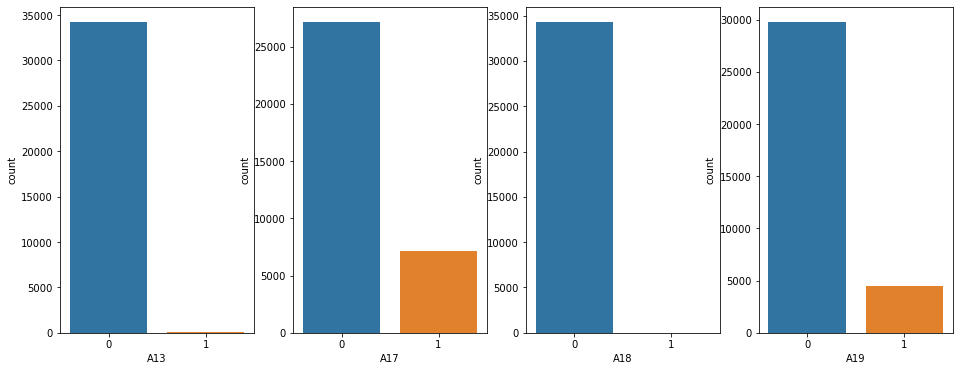

In [16]:
pylab.rcParams[ 'figure.figsize' ] = 16 , 6
fig, ax =plt.subplots(1,4)
sns.countplot(df['A13'], ax=ax[0])
sns.countplot(df['A17'], ax=ax[1])
sns.countplot(df['A18'], ax=ax[2])
sns.countplot(df['A19'], ax=ax[3])
fig.show()
print(df['A13'].value_counts())
print(df['A17'].value_counts())
print(df['A18'].value_counts())
print(df['A19'].value_counts())

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


1    32991
0     1290
Name: A20, dtype: int64
0    34274
1        7
Name: A22, dtype: int64
0    22988
1    11293
Name: Target, dtype: int64


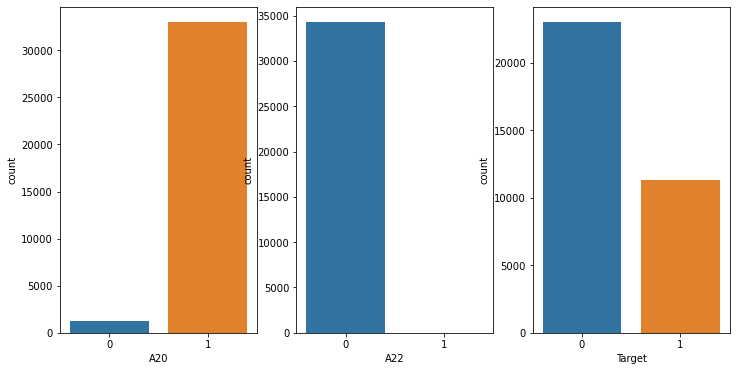

In [17]:
pylab.rcParams[ 'figure.figsize' ] = 12 , 6
fig, ax =plt.subplots(1,3)
sns.countplot(df['A20'], ax=ax[0])
sns.countplot(df['A22'], ax=ax[1])
sns.countplot(df['Target'], ax=ax[2])
fig.show()
print(df['A20'].value_counts())
print(df['A22'].value_counts())
print(df['Target'].value_counts())

AxesSubplot(0.125,0.125;0.775x0.755)


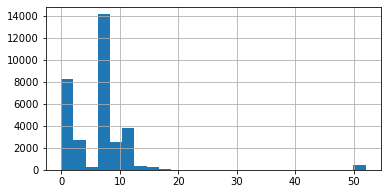

In [18]:
pylab.rcParams[ 'figure.figsize' ] = 6 , 3
print(df['A2'].hist(bins=25))

AxesSubplot(0.125,0.125;0.775x0.755)


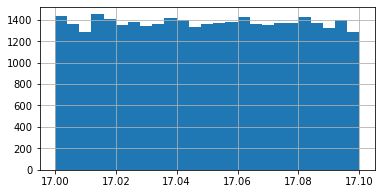

In [19]:
print(df['A21'].hist(bins=25))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000096ADC30708>,
      dtype=object)

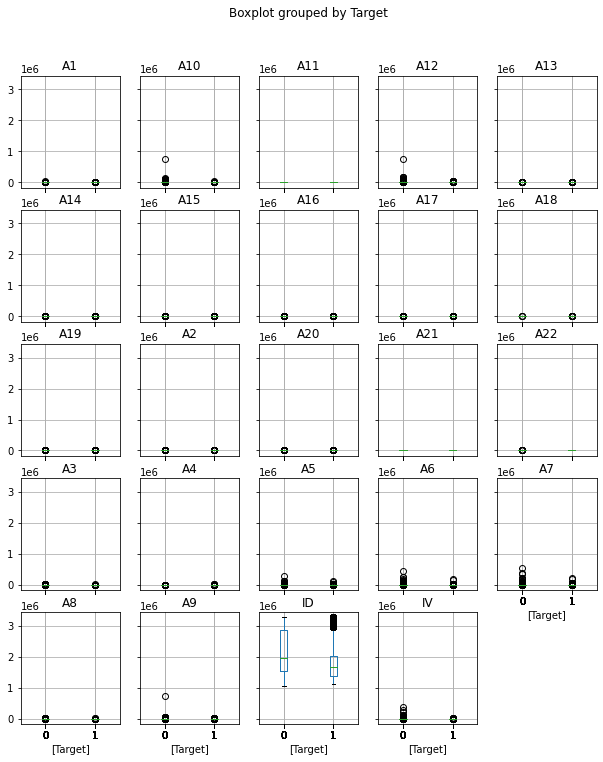

In [20]:
pylab.rcParams[ 'figure.figsize' ] = 10 , 12
df.boxplot(by='Target')

## Bivariate Analysis

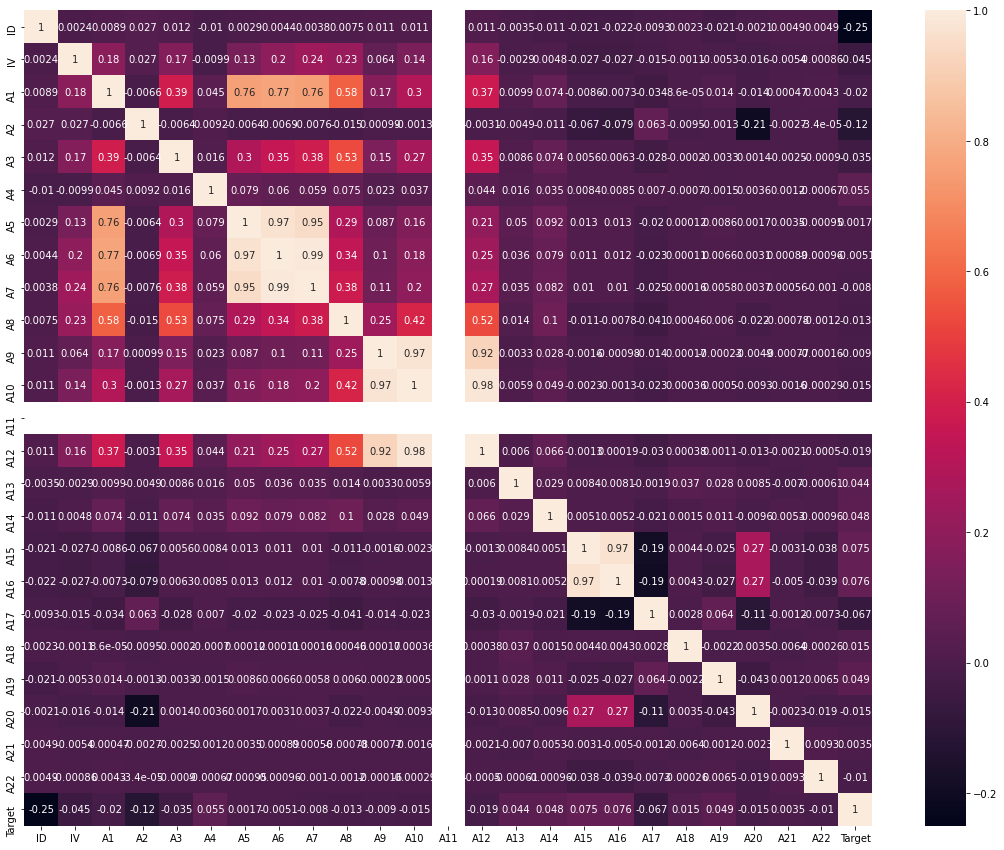

In [21]:
# Correlation
plt.figure(figsize=(19, 15))

vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [22]:
# Correlation graph reveals the highly correlated variables
# A5,A6,A7
# A9,A10,A12
# A15,A16

In [23]:
df.drop('A11',inplace=True, axis=1) # since A11 is constant.

In [24]:
df.shape

(34281, 24)

## Missing value treatment

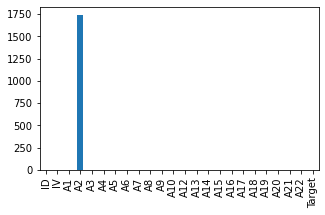

In [25]:
# to check missing Values
plt.figure(figsize=(5,3))
df.isnull().sum().plot.bar()

In [26]:
df['A2'].isnull().sum()

1743

In [27]:
# A2 has 1743 missing values(5.1%)

In [28]:
df['A2'].value_counts()

8.0     14091
2.0      7887
12.0     3738
4.0      2269
9.0      2259
3.0       419
52.0      413
0.0       314
10.0      269
14.0      190
16.0      179
6.0       113
13.0      111
5.0        96
15.0       80
17.0       61
11.0       29
30.0        6
20.0        5
26.0        2
7.0         2
22.0        2
18.0        2
28.0        1
Name: A2, dtype: int64

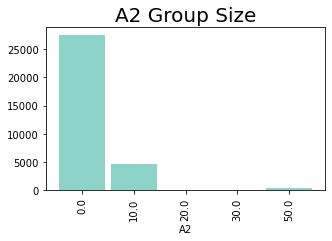

In [29]:
plt.figure(figsize=(5,3))
df.groupby(df.A2//10*10).size().plot.bar(cmap='Set3', width=0.9)
plt.title('A2 Group Size', fontsize = 20)
plt.show()

In [30]:
df['A2'].mode()

0    8.0
dtype: float64

In [31]:
# Let's fill the missing values with mode value of that column
df['A2'].fillna(df['A2'].mode()[0], inplace=True)

In [32]:
#df.dropna(axis=0)

In [33]:
df.shape

(34281, 24)

In [34]:
df.isnull().values.sum()

0

## Outlier Treatment

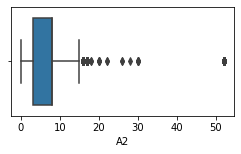

In [35]:
plt.figure(figsize=(4,2))
sns.boxplot('A2',data=df)

In [36]:
df[df['A2'] >50]

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
188,1945020,29,1,52.0,0,0,0,0,0,1,...,0,0.91,0.90,1,0,0,0,17.030575,0,0
372,1333070,82,47,52.0,0,0,0,0,0,0,...,0,1.00,0.99,1,0,0,1,17.085184,0,0
386,1320105,633,26,52.0,1,0,0,0,0,6,...,0,-99.00,0.50,1,0,0,0,17.099651,0,0
389,1935874,1,0,52.0,0,0,0,0,0,0,...,0,0.76,0.73,1,0,0,1,17.051438,0,0
416,2138844,184,4,52.0,0,0,0,0,0,5,...,0,0.93,0.96,1,0,0,1,17.000576,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32785,2854051,0,0,52.0,0,0,25,25,25,0,...,25,0.79,0.87,1,0,1,0,17.042388,0,1
33193,1660714,-14,1,52.0,0,14,0,0,0,10,...,0,0.87,0.88,1,0,1,0,17.021489,0,1
33223,1762264,0,0,52.0,0,0,25,25,25,0,...,0,0.82,0.88,1,0,1,0,17.051617,0,1
33390,1291216,4,0,52.0,0,0,0,0,0,1,...,0,-99.00,-99.00,1,0,0,0,17.026291,0,1


In [37]:
# Since there are 413 rows with this outlier value, we cannot remove it.

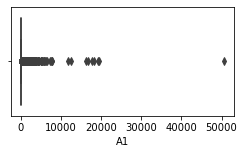

In [38]:
plt.figure(figsize=(4,2))
sns.boxplot('A1',data=df)

In [39]:
df[df['A1'] >45000]

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
14016,2265426,0,50547,8.0,0,0,260660,438020,533540,0,...,0,0.89,0.91,0,0,0,1,17.049014,0,0


In [40]:
# Let's delete the above row
df = df.drop([14016], axis=0)

In [41]:
df.shape

(34280, 24)

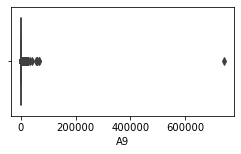

In [42]:
plt.figure(figsize=(4,2))
sns.boxplot('A9',data=df)

In [43]:
df[df['A9'] >600000]

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
14289,3126776,26,96,12.0,0,4,1000,1400,1800,168,...,0,0.94,0.87,0,0,0,1,17.048809,0,0


In [44]:
df = df.drop([14289], axis=0)

In [45]:
df.shape

(34279, 24)

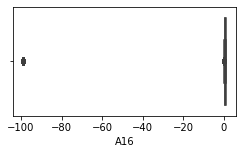

In [46]:
plt.figure(figsize=(4,2))
sns.boxplot('A16',data=df)

In [47]:
df[df['A16'] == -99].shape

(2103, 24)

In [48]:
df[df['A15'] == -99].shape

(2233, 24)

In [49]:
# Columns A15 & A16 has value "-99" in 2233(6.5%) & 2103(6.1%) rows respectively. We have to handle it

In [50]:
b= df[df['A15'] != -99]

In [51]:
b.shape

(32046, 24)

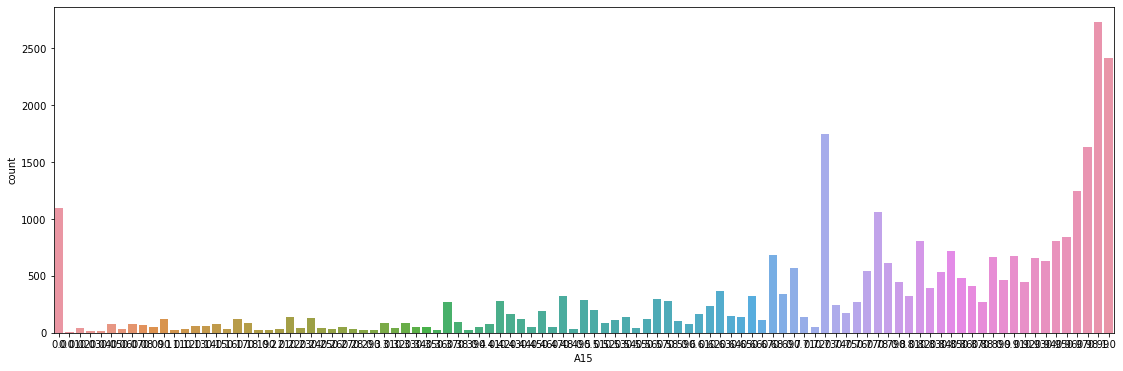

In [52]:
plt.figure(figsize=(19,6))
sns.countplot(b['A15'])

In [53]:
df['A15'].skew()

-3.523828473892624

In [54]:
b['A15'].skew()

-1.4052330927636576

In [55]:
# since the data is skewed let's replace the value "-99" with median of b['A15']

In [56]:
b['A15'].median()

0.83

In [57]:
df['A15']=df['A15'].replace(-99,0.83)

In [58]:
df[df['A15'] == -99].shape

(0, 24)

In [59]:
df[df['A16'] == -99].shape

(2103, 24)

In [60]:
c= df[df['A16'] != -99]

In [61]:
c.shape

(32176, 24)

In [62]:
b['A16'].skew()

-1.4099505446818186

In [63]:
b['A16'].median()

0.82

In [64]:
df['A16']=df['A16'].replace(-99,0.82)

In [65]:
df[df['A16'] == -99].shape

(0, 24)

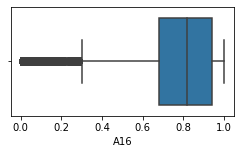

In [66]:
plt.figure(figsize=(4,2))
sns.boxplot('A16',data=df)

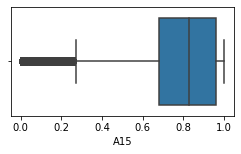

In [67]:
plt.figure(figsize=(4,2))
sns.boxplot('A15',data=df)

# Feature Engineering

## Variable Transformation

In [68]:
# Variables with high skewness
# IV,A1,A3,A4,A6,A8,A10,A14

#### Sqrt transformation (solving skewness)

In [69]:
print(df['IV'].skew())
IV_sqrt = np.sqrt(df['IV'])
IV_sqrt.skew()

69.22846277582329


C:\Users\USER\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


11.017971813843143

In [70]:
print(df['A1'].skew())
A1_sqrt = np.sqrt(df['A1'])
A1_sqrt.skew()

36.162131309056356


7.641879210579845

In [71]:
print(df['A3'].skew())
A3_sqrt = np.sqrt(df['A3'])
A3_sqrt.skew()

56.78650196128316


12.092408829305915

In [72]:
print(df['A4'].skew())
A4_sqrt = np.sqrt(df['A4'])
A4_sqrt.skew()

53.72565726278051


17.20196071012441

In [73]:
print(df['A6'].skew())
A6_sqrt = np.sqrt(df['A6'])
A6_sqrt.skew()

45.096055349432746


10.207499803179106

In [74]:
print(df['A8'].skew())
A8_sqrt = np.sqrt(df['A8'])
A8_sqrt.skew()

34.21215318615493


8.567236561100692

In [75]:
print(df['A10'].skew())
A10_sqrt = np.sqrt(df['A10'])
A10_sqrt.skew()

34.37825302681974


8.29724098304742

In [76]:
print(df['A14'].skew())
A14_sqrt = np.sqrt(df['A14'])
A14_sqrt.skew()

31.558384882514563


12.653949141543542

In [77]:
df['IV_sqrt']=IV_sqrt
df['A1_sqrt']=A1_sqrt
df['A3_sqrt']=A3_sqrt
df['A4_sqrt']=A4_sqrt
df['A6_sqrt']=A6_sqrt
df['A8_sqrt']=A8_sqrt
df['A10_sqrt']=A10_sqrt
df['A14_sqrt']=A14_sqrt

In [78]:
df.columns

Index(['ID', 'IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'Target', 'IV_sqrt', 'A1_sqrt', 'A3_sqrt', 'A4_sqrt', 'A6_sqrt',
       'A8_sqrt', 'A10_sqrt', 'A14_sqrt'],
      dtype='object')

## Feature Selection

In [79]:
X= df.drop(['ID', 'IV_sqrt', 'A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A13', 'A15', 'Target'],axis =1)
y= df['Target']

In [80]:
X.head()

,IV,A2,A12,A14,A16,A17,A18,A19,A20,A21,A22,A1_sqrt,A3_sqrt,A4_sqrt,A6_sqrt,A8_sqrt,A10_sqrt,A14_sqrt
0,2049,8.0,330,0,0.69,0,0,0,1,17.078971,0,6.633250,3.316625,0.0,0.000000,6.164414,15.165751,0.0
1,48,8.0,1,0,0.78,1,0,0,1,17.022384,0,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.0
2,318,9.0,2,0,0.79,1,0,0,0,17.024773,0,1.414214,0.000000,0.0,0.000000,0.000000,1.414214,0.0
3,62,2.0,71,0,0.47,0,0,0,1,17.074995,0,2.000000,0.000000,0.0,3.872983,2.645751,6.480741,0.0
4,2,8.0,2,0,0.81,0,0,0,1,17.072697,0,0.000000,0.000000,0.0,0.000000,0.000000,1.414214,0.0


In [81]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

# Train-Test Split

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (27423, 18) (27423,)
Test set: (6856, 18) (6856,)


# Normalize data

In [83]:
from sklearn import preprocessing
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
# Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [84]:
X_train[0:2]

array([[-0.06608894,  0.10895035, -0.09702456, -0.0686886 ,  0.87691701,
         1.93718515, -0.0159789 , -0.38904514,  0.19604929,  0.41178267,
        -0.01479332, -0.15582845, -0.24535036, -0.13415185, -0.38437835,
        -0.42356135, -0.18024089, -0.13992647],
       [-0.06580404, -0.90579393, -0.1041041 , -0.0686886 , -1.43992626,
         1.93718515, -0.0159789 , -0.38904514,  0.19604929,  0.41140792,
        -0.01479332, -0.41434092, -0.24535036, -0.13415185, -0.38437835,
        -0.42356135, -0.44702727, -0.13992647]])

In [85]:
X_test[0:2]

array([[ 0.02624629,  0.07594974,  0.27769513, -0.05968923,  0.67735896,
        -0.50268782, -0.02416136, -0.3931889 ,  0.2044186 , -1.51242147,
        -0.01207803,  1.95307313,  1.33363878, -0.14788394,  1.35766057,
         1.1550522 ,  1.49733193, -0.14386896],
       [-0.08554653,  0.07594974, -0.1221869 , -0.05968923,  0.67735896,
        -0.50268782, -0.02416136, -0.3931889 ,  0.2044186 , -0.24135654,
        -0.01207803, -0.42256449, -0.23784381, -0.14788394, -0.38904516,
        -0.43189203, -0.46446474, -0.14386896]])

# Build Model (Classification)

### SVM

In [86]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [87]:
svmclassifier=svm.SVC(kernel='linear',degree=1).fit(X_train,y_train)
y_pred_linear=svmclassifier.predict(X_test)
accuracy_score(y_test,y_pred_linear)

0.801196032672112

In [88]:
svmclassifier=svm.SVC(kernel='poly',degree=1).fit(X_train,y_train)
y_pred_poly=svmclassifier.predict(X_test)
accuracy_score(y_test,y_pred_poly)

0.7556884480746792

In [89]:
svmclassifier=svm.SVC(kernel='sigmoid',degree=1).fit(X_train,y_train)
y_pred_sigmoid=svmclassifier.predict(X_test)
accuracy_score(y_test,y_pred_sigmoid)

0.5646149358226371

In [90]:
svmclassifier=svm.SVC(kernel='rbf',degree=1).fit(X_train,y_train)
y_pred_rbf=svmclassifier.predict(X_test)
accuracy_score(y_test,y_pred_rbf)

0.8061551925320887

In [91]:
# I selected the kernel rbf

In [92]:
print(svmclassifier)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()

In [94]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 5, max_features= 8, random_state= 70).fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
print(tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=70, splitter='best')


In [95]:
accuracy_score(y_test,y_pred_tree)

0.7584597432905484

## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression().fit(X_train,y_train)
y_pred_log = logmodel.predict(X_test)
from sklearn.metrics import log_loss
print(logmodel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [97]:
accuracy_score(y_test,y_pred_log)

0.7787339556592765

## Random Forest

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats import randint as sp_randint

In [99]:
rf = RandomForestClassifier(verbose=1,n_jobs=-1, class_weight='balanced')

params = {"n_estimators":[10,100,500,700],
          "max_depth": [3,5, None],
          "max_features": sp_randint(5, 11),
          "min_samples_split": sp_randint(5, 11),
          "min_samples_leaf": sp_randint(5, 11),
          "bootstrap": [True, False],
          "criterion": ["entropy"]}

# run randomized search
n_iter_search = 5
# n_iter parameter of RandomizedSeacrhCV controls, how many parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(rf,
                                   param_distributions=params,
                                   n_iter=n_iter_search,
                                   random_state=2)

random_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 693 out of 700 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   10.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Using backend Threadin

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
      

In [100]:
print('Best Params \n', random_search.best_estimator_)
print('Best Score \n', random_search.best_score_)

Best Params 
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)
Best Score 
 0.896947845958775


In [101]:
rf_final = random_search.best_estimator_.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   37.3s finished


In [104]:
# Generate a report of the train and test
from sklearn.metrics import classification_report
def model_report(x_df, y_df, mod):
    pred=mod.predict(x_df)

    df=pd.DataFrame(list(zip(y_df,pred)),columns=["real","predicted"])

    k=pd.crosstab(df['real'],df["predicted"])
    print('Confusion Matrix \n', k, '\n')
    
    print('Report \n', classification_report(y_df, pred))

In [105]:
model_report(X_train, y_train, rf_final)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    3.4s finished


Confusion Matrix 
 predicted      0     1
real                  
0          17250  1191
1            172  8810 

Report 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     18441
           1       0.88      0.98      0.93      8982

    accuracy                           0.95     27423
   macro avg       0.94      0.96      0.95     27423
weighted avg       0.95      0.95      0.95     27423



## Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
Naiveclassifier = GaussianNB().fit(X_train, y_train)
y_pred_naive= Naiveclassifier.predict(X_test)
print(Naiveclassifier)

GaussianNB(priors=None, var_smoothing=1e-09)


# Model Evaluation

In [107]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### SVM

In [108]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_rbf))
print("Classification Report:")
print(classification_report(y_test,y_pred_rbf))
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,y_pred_rbf)*100,2),'%')
print('F1-SCORE : %.2f' % f1_score(y_test,y_pred_rbf,average='weighted'))
print('Train Accuracy: ',accuracy_score(y_train, svmclassifier.predict(X_train))*100,'%')

Confusion Matrix:
[[4042  503]
 [ 826 1485]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4545
           1       0.75      0.64      0.69      2311

    accuracy                           0.81      6856
   macro avg       0.79      0.77      0.77      6856
weighted avg       0.80      0.81      0.80      6856

Jaccard Similarity Score :  80.62 %
F1-SCORE : 0.80


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Train Accuracy:  81.2529628414105 %


### Decision Tree

In [109]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_tree))
print("Classification Report:")
print(classification_report(y_test,y_pred_tree))
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,y_pred_tree)*100,2),'%')
print('F1-SCORE : %.2f' % f1_score(y_test,y_pred_tree,average='weighted'))
print('Train Accuracy: ',accuracy_score(y_train,tree.predict(X_train))*100,'%')

Confusion Matrix:
[[3432 1113]
 [ 543 1768]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      4545
           1       0.61      0.77      0.68      2311

    accuracy                           0.76      6856
   macro avg       0.74      0.76      0.74      6856
weighted avg       0.78      0.76      0.76      6856

Jaccard Similarity Score :  75.85 %
F1-SCORE : 0.76
Train Accuracy:  85.61061882361521 %


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Logistic Regression

In [110]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_log))
print("Classification Report:")
print(classification_report(y_test,y_pred_log))
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,y_pred_log)*100,2),'%')
print('F1-SCORE :  %.2f' % f1_score(y_test,y_pred_log,average='weighted'))
print('Train Accuracy: ',accuracy_score(y_train, logmodel.predict(X_train))*100,'%')
LR_prob = logmodel.predict_proba(X_test)
print('LogLoss: %.2f' % log_loss(y_test, LR_prob))

Confusion Matrix:
[[4128  417]
 [1100 1211]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      4545
           1       0.74      0.52      0.61      2311

    accuracy                           0.78      6856
   macro avg       0.77      0.72      0.73      6856
weighted avg       0.77      0.78      0.77      6856

Jaccard Similarity Score :  77.87 %
F1-SCORE :  0.77
Train Accuracy:  76.94635889581738 %
LogLoss: 0.49


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

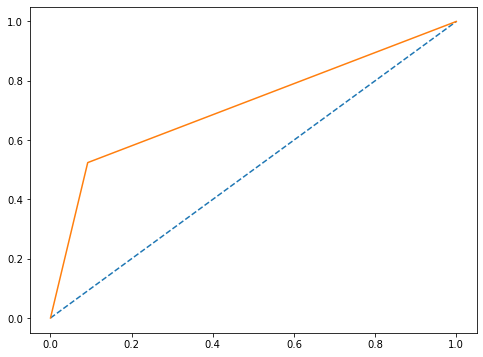

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

### Random Forest

In [113]:
model_report(X_test, y_test, rf_final)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s


Confusion Matrix 
 predicted     0     1
real                 
0          2900  1645
1           120  2191 

Report 
               precision    recall  f1-score   support

           0       0.96      0.64      0.77      4545
           1       0.57      0.95      0.71      2311

    accuracy                           0.74      6856
   macro avg       0.77      0.79      0.74      6856
weighted avg       0.83      0.74      0.75      6856



[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    1.5s finished


### Naive Bayes

In [114]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_naive))
print("Classification Report:")
print(classification_report(y_test,y_pred_naive))
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,y_pred_naive)*100,2),'%')
print('F1-SCORE : %.2f' % f1_score(y_test,y_pred_naive,average='weighted'))
print('Train Accuracy: ',accuracy_score(y_train,Naiveclassifier.predict(X_train))*100,'%')

Confusion Matrix:
[[4545    0]
 [2311    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80      4545
           1       0.00      0.00      0.00      2311

    accuracy                           0.66      6856
   macro avg       0.33      0.50      0.40      6856
weighted avg       0.44      0.66      0.53      6856

Jaccard Similarity Score :  66.29 %
F1-SCORE : 0.53
Train Accuracy:  37.24975385625205 %


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Report

In [120]:
Algoritm=['SVM','Decision Tree','LogisticRegression','Random Forest','Naive Bayes']

j_1=round(jaccard_similarity_score(y_test,y_pred_rbf)*100,2)
j_2=round(jaccard_similarity_score(y_test,y_pred_tree)*100,2)
j_3=round(jaccard_similarity_score(y_test,y_pred_log)*100,2)
j_4=round(0.74*100,2)
j_5=round(jaccard_similarity_score(y_test,y_pred_naive)*100,2)
Jaccard=[j_1,j_2,j_3,j_4,j_5]

f1_1='%.2f' % f1_score(y_test,y_pred_rbf,average='weighted')
f1_2='%.2f' % f1_score(y_test,y_pred_tree,average='weighted')
f1_3='%.2f' % f1_score(y_test,y_pred_log,average='weighted')
f1_4=np.NAN
f1_5='%.2f' % f1_score(y_test,y_pred_naive,average='weighted')
F1_score=[f1_1,f1_2,f1_3,f1_4,f1_5]

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [123]:
table = pd.DataFrame({
    "Algorithm": Algoritm,
    "Jaccard": Jaccard,
    "F1-Score": F1_score,
    "LogLoss":[np.NAN,np.NAN,'%.2f' % log_loss(y_test, LR_prob),np.NAN,np.NAN]})

In [124]:
table

,Algorithm,Jaccard,F1-Score,LogLoss
0,SVM,80.62,0.80,NaN
1,Decision Tree,75.85,0.76,NaN
2,LogisticRegression,77.87,0.77,0.49
3,Random Forest,74.00,NaN,NaN
4,Naive Bayes,66.29,0.53,NaN


### Of these models SVM gives the better result.